<a href="https://colab.research.google.com/github/iaryanraj212/Machine-Learning/blob/main/LabAss7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

w0 = -0.10000000000000765 , w1 =0.1000000000000001 , w2 = 0.05000000000000032 ,epoch = 130


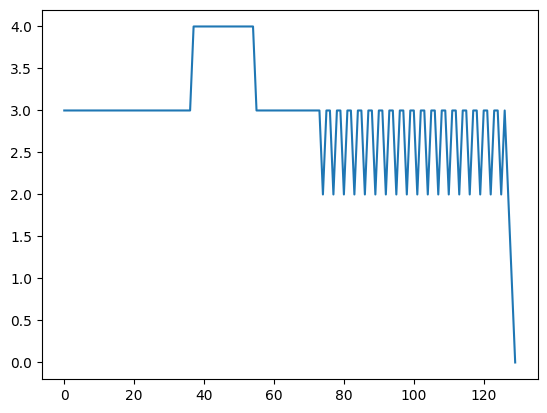

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def step_activation(s):
  if s >= 0:
    return 1
  else:
    return 0

def sum_square_error(li):
  sum = 0
  for i in li:
    sum += i**2
  return sum

def bipolar_activation(s):
  if s >= 0:
    return 1
  else:
    return -1

def sigmoid_activation(s):
  return 1/(1 + np.exp(-s))

def reLU(s):
  return max(0,s)
def call_nn(inp,out,w0,w1,w2,a,func):

    total_error = 1
    total_error_for_each_epoch = []
    for epoch in range(1000) :
      if total_error <= 0.02:
        break

      error_list = []
      predict_list =[]

      for idx,obs in enumerate(inp):
        Z = obs[0] * w1 + obs[1] * w2 + w0
        s = func(Z)
        predict_list.append(s)
        error = out[idx] -s
        error_list.append(error)
        w0 += a * error
        w1 += a * error * obs[0]
        w2 += a * error * obs[1]

      total_error = sum_square_error(error_list)
      total_error_for_each_epoch.append(total_error)



    return w0,w1,w2,total_error_for_each_epoch,epoch

input = [[0,0],
         [0,1],
         [1,0],
         [1,1]]

output = [0,0,0,1]
W0 = 10
W1 = 0.2
W2=-0.75
alpha = 0.05

w0,w1,w2,total_error_for_each_epoch,epoch = call_nn(input,output,W0,W1,W2,alpha,step_activation)

print(f"w0 = {w0} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)


w0 = -0.0999999999999975 , w1 =0.09999999999999902 , w2 = 0.05000000000000643 ,epoch = 999


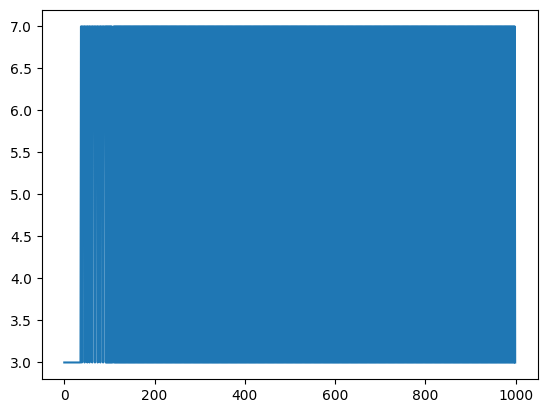

In [2]:
w0,w1,w2,total_error_for_each_epoch,epoch = call_nn(input,output,W0,W1,W2,alpha,bipolar_activation)

print(f"w0 = {w0} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)

w0 = -6.135313078734431 , w1 =3.9708332064060725 , w2 = 3.9639483472599917 ,epoch = 999


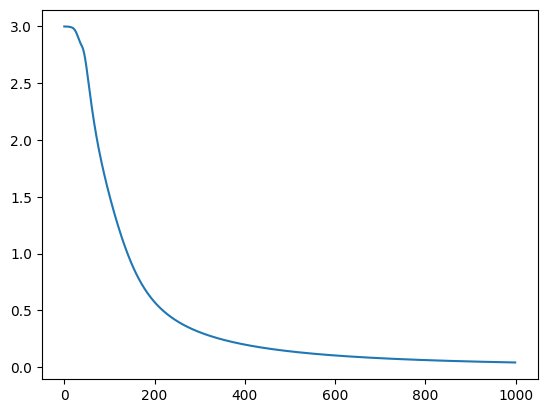

In [3]:
import numpy as np

w0,w1,w2,total_error_for_each_epoch,epoch = call_nn(input,output,W0,W1,W2,alpha,sigmoid_activation)

print(f"w0 = {w0} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)

w0 = -0.7731455948044091 , w1 =0.8466613290400595 , w2 = 0.842424415909374 ,epoch = 265


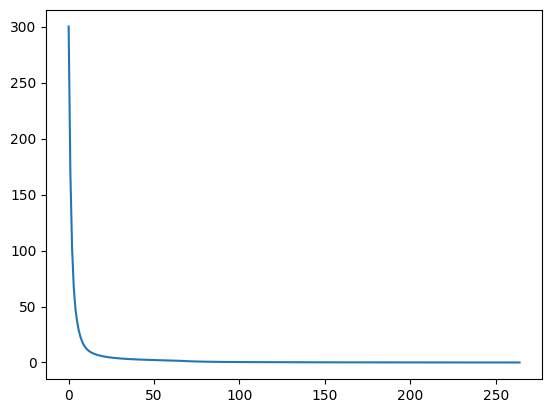

In [4]:
import numpy as np

w0,w1,w2,total_error_for_each_epoch,epoch = call_nn(input,output,W0,W1,W2,alpha,reLU)

print(f"w0 = {w0} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)

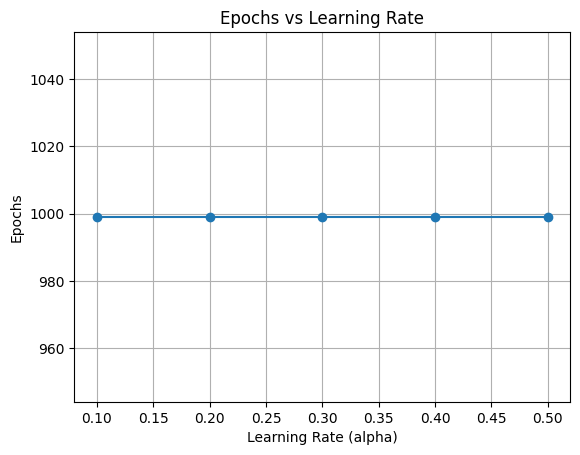

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# XOR input and output data (Example dataset)
input = np.array([[0,0], [0,1], [1,0], [1,1]])
output = np.array([[0], [1], [1], [0]])

# Random initial weights
W0 = np.random.rand(2, 2)
W1 = np.random.rand(2, 1)

# Activation function (step function)
def step_activation(x):
    return 1 if x > 0.5 else 0

# Neural network function
def call_nn(input, output, W0, W1, alpha, activation_func, epochs=1000):
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(input)):
            # Forward propagation
            hidden_input = np.dot(input[i], W0)
            hidden_output = np.array([activation_func(x) for x in hidden_input])
            final_output = activation_func(np.dot(hidden_output, W1))

            # Error
            error = output[i] - final_output
            total_error += abs(error)

            # Weight updates (simplified backpropagation)
            W1 += alpha * error * hidden_output.reshape(-1, 1)
            W0 += alpha * error * np.outer(input[i], W1.T)

        if total_error == 0:
            break
    return W0, W1, total_error, epoch

# Learning rates
rate = [0.1, 0.2, 0.3, 0.4, 0.5]

# Empty list to store epochs for different learning rates
epochs_list_for_different_alpha = []

# Test different learning rates
for alpha in rate:
    W0_copy, W1_copy = W0.copy(), W1.copy()  # Ensure each run starts with same initial weights
    _, _, _, epoch = call_nn(input, output, W0_copy, W1_copy, alpha, step_activation)
    epochs_list_for_different_alpha.append(epoch)

# Plot learning rates vs. epochs
plt.plot(rate, epochs_list_for_different_alpha, marker='o')
plt.xlabel('Learning Rate (alpha)')
plt.ylabel('Epochs')
plt.title('Epochs vs Learning Rate')
plt.grid(True)
plt.show()


w0 = 0.09999999999999236 , w1 =-0.09999999999999969 , w2 = -0.09999999999999969 ,epoch = 999


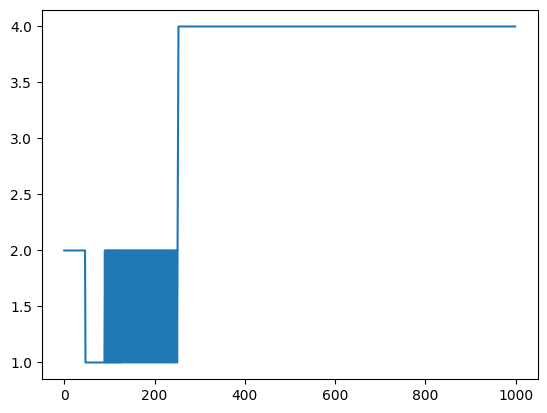

In [7]:
import matplotlib.pyplot as plt

def step_activation(s):
  if s >= 0:
    return 1
  else:
    return 0

def bipolar_activation(s):
  if s > 0:
    return 1
  elif s == 0:
    return 0
  else:
    return -1

def sigmoid_activation(s):
  return 1/(1 + np.exp(-s))

def reLU(s):
  if s > 0:
    return s
  else:
    return 0

def summation_unit(x1,w1,x2,w2,w0):
  return x1 * w1 + x2 * w2 + w0

def sum_square_error(li):
  sum = 0
  for i in li:
    sum += i**2
  return sum

def comparator_unit(error,a):
  return  error * a

def call_nn(inp,out,w0,w1,w2,a,fun):

    total_error = 1
    total_error_for_each_epoch = []
    for epoch in range(1000) :
      if total_error <= 0.02:
        break

      error_list = []
      predict_list =[]
      for idx,obs in enumerate(inp):
        # Z = obs[0] * w1 + obs[1] * w2 + w0
        Z = summation_unit(obs[0],w1,obs[1],w2,w0)
        s = fun(Z)
        predict_list.append(s)
        error = s - out[idx]
        error_list.append(error)
        w0 -= comparator_unit(error,a)
        w1 -= comparator_unit(error,a) * obs[0]
        w2 -= comparator_unit(error,a) * obs[1]

      total_error = sum_square_error(error_list)
      total_error_for_each_epoch.append(total_error)



    return w0,w1,w2,total_error_for_each_epoch,epoch



input = [[0,0],
         [0,1],
         [1,0],
         [1,1]]

output = [0,1,1,0]
W0 = 10
W1 = 0.2
W2=-0.75
alpha = 0.05

w0,w1,w2,total_error_for_each_epoch,epoch = call_nn(input,output,W0,W1,W2,alpha,step_activation)

print(f"w0 = {w0} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)



w0 = 0.1999999999999919 , w1 =-0.09999999999999969 , w2 = -0.15000000000000013 ,epoch = 999


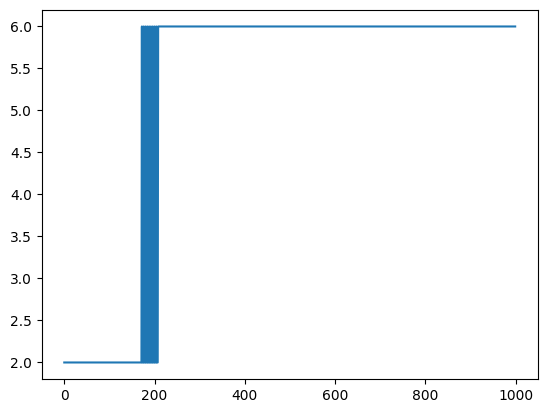

In [8]:
w0,w1,w2,total_error_for_each_epoch,epoch = call_nn(input,output,W0,W1,W2,alpha,bipolar_activation)

print(f"w0 = {w0} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)


w0 = 0.02876922691700229 , w1 =-0.05348672816495928 , w2 = -0.028195910183807477 ,epoch = 999


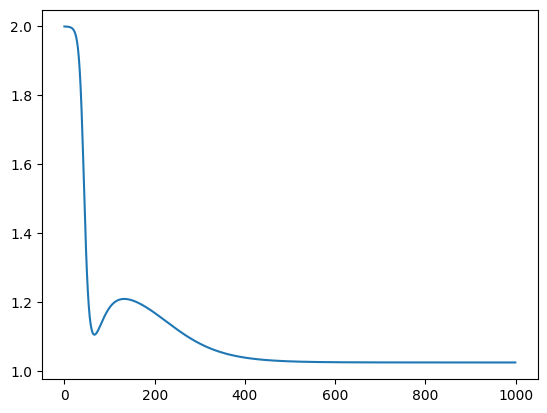

In [9]:
w0,w1,w2,total_error_for_each_epoch,epoch = call_nn(input,output,W0,W1,W2,alpha,sigmoid_activation)

print(f"w0 = {w0} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)


w0 = 0.526315789473727 , w1 =-0.052631578947401975 , w2 = -0.026315789473718664 ,epoch = 999


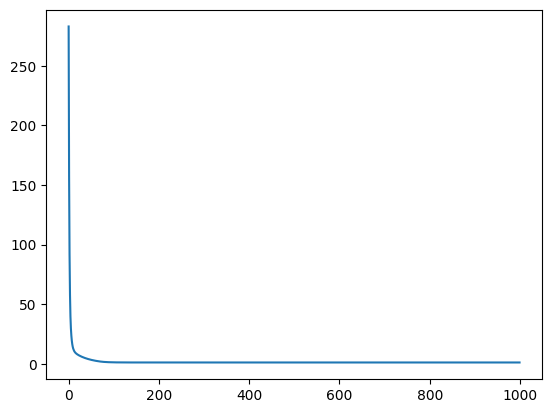

In [10]:
w0,w1,w2,total_error_for_each_epoch,epoch = call_nn(input,output,W0,W1,W2,alpha,reLU)

print(f"w0 = {w0} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)


<ipython-input-11-2c326653664e>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


[-10.62004111166331, -278.92502375913995, 43.158176340915254, -117.02344247968831, 24.452710356903182]
1.0
0.0


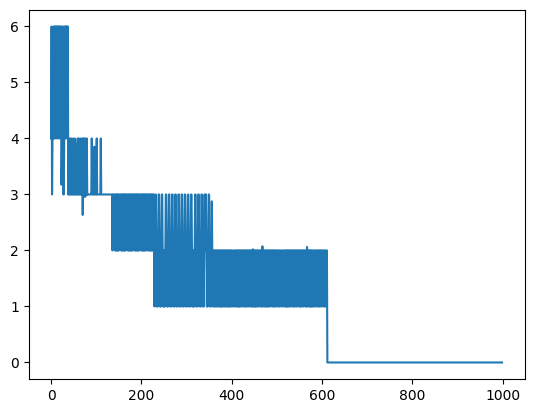

In [11]:
import numpy as np
import matplotlib.pyplot as plt



def summation_unit(ob1,ob2,ob3,ob4,w0,w1,w2,w3,w4):
  return ob1 * w1 + ob2 * w2 + ob3 * w3 + ob4 * w4 + w0


def sigmoid_act(Z):
  return 1 / (1 + np.exp(-Z))




def comparator_unit(a, error):
  return a * error


def sum_square_error(error):
  return sum([i ** 2 for i in error])

def perceptron(inp,out,w0,w1,w2,w3,w4,a,func):
  total_error = 1
  total_error_in_epoch = []

  for epoch in range(1000):
    error_list = []

    for idx,obs in enumerate(inp):
        # print(w0,w1,w2,w3,w4)
        Z = summation_unit(obs[0],obs[1],obs[2],obs[3],w0,w1,w2,w3,w4)
        s = func(Z)
        error = out[idx] - s
        error_list.append(error)
        w0 += comparator_unit(a,error)
        w1 += comparator_unit(a,error) * obs[0]
        w2 += comparator_unit(a,error) * obs[1]
        w3 += comparator_unit(a,error) * obs[2]
        w4 += comparator_unit(a,error) * obs[3]
    total_error = sum_square_error(error_list)
    total_error_in_epoch.append(total_error)

  return total_error_in_epoch,epoch,w0,w1,w2,w3,w4


customer_data = [[20,6,2,386],
                 [16,3,6,289],
                 [27,6,2,393],
                 [19,1,2,110],
                 [24,4,2,280],
                 [22,1,5,167],
                 [15,4,2,271],
                 [18,4,2,274],
                 [21,1,4,148],
                 [16,2,4,198]]
output = [1,1,1,0,1,0,1,1,0,0]
W0 = 10
W1 = 0.2
W2=-0.75
W3 = 0.3
W4 = 0.45
alpha = 0.05

total_error_for_each_epoch,epochs,w0,w1,w2,w3,w4 = perceptron(customer_data,output,W0,W1,W2,W3,W4,alpha,sigmoid_act)
weigh = [w0,w1,w2,w3,w4]
print(weigh)
plt.plot(total_error_for_each_epoch)

def test(w0,w1,w2,w3,w4,inp,out):
   Z = summation_unit(inp[0],inp[1],inp[2],inp[3],w0,w1,w2,w3,w4)
   s = sigmoid_act(Z)
   return s


out = 1
inp = [20,6,2,386]

s = test(w0,w1,w2,w3,w4,inp,out)
print(s)

inp1 = [19,1,2,110]
s = test(w0,w1,w2,w3,w4,inp1,out)
print(s)

Pseudo-Inverse of X:
 [[ 2.50337160e-02 -2.96982669e-01 -1.14161729e+00  9.85416569e-01
  -3.24136635e-01 -6.13255591e-01  1.17584324e+00  6.75849945e-01
  -8.03648709e-02  5.94213595e-01]
 [-1.23903687e-02 -2.37383945e-02  4.66078189e-02 -7.53884898e-04
   2.93487999e-02  3.22758125e-02 -4.65060128e-02 -2.12210752e-02
   2.12659134e-02 -2.48886085e-02]
 [ 8.56722697e-03 -4.49416735e-02 -1.57308029e-03  2.88803345e-02
   1.03185626e-02 -2.84320542e-02  2.33561005e-02  1.90102545e-02
  -9.32792464e-03 -5.85774647e-03]
 [-2.54072220e-02  1.38768789e-01  2.28724688e-03 -8.83557225e-02
  -3.31786703e-02  8.50608683e-02 -6.87858446e-02 -5.69167865e-02
   2.72553380e-02  1.92720041e-02]
 [ 1.47711783e-03  2.30776228e-03  1.25884687e-03 -2.73848958e-03
  -3.46324025e-04 -3.91540600e-04 -6.56899274e-05 -1.59234627e-04
  -1.17385693e-03 -1.68591299e-04]]
Estimated Weights:
 [ 0.1139903  -0.02789923  0.01473739 -0.04323249  0.00447248]


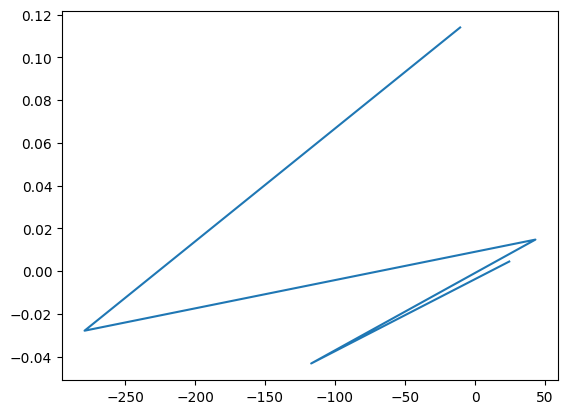

In [12]:
import numpy as np

# Customer data (input matrix)
customer_data = np.array([[20, 6, 2, 386],
                          [16, 3, 6, 289],
                          [27, 6, 2, 393],
                          [19, 1, 2, 110],
                          [24, 4, 2, 280],
                          [22, 1, 5, 167],
                          [15, 4, 2, 271],
                          [18, 4, 2, 274],
                          [21, 1, 4, 148],
                          [16, 2, 4, 198]])

# Output (target values)
output = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Add bias term (column of 1's) to the customer_data matrix
X = np.c_[np.ones(customer_data.shape[0]), customer_data]  # Adds bias/intercept term

# X
# Calculate the pseudo-inverse of matrix X
X_pseudo_inverse = np.linalg.pinv(X)

# # Estimate the weights using the pseudo-inverse formula
weights = np.dot(X_pseudo_inverse, output)

# # Output the pseudo-inverse matrix and the weights
print("Pseudo-Inverse of X:\n", X_pseudo_inverse)
print("Estimated Weights:\n", weights)


plt.plot(weigh,weights)

v11 =2.008265867807325 , v12 =0.23649954228836698 ,v21 = -0.8461723198075211 , v22 =-1.1349279560186372 , w1 =5.113415123904196 , w2 = -10.053651667695844 ,epoch = 999


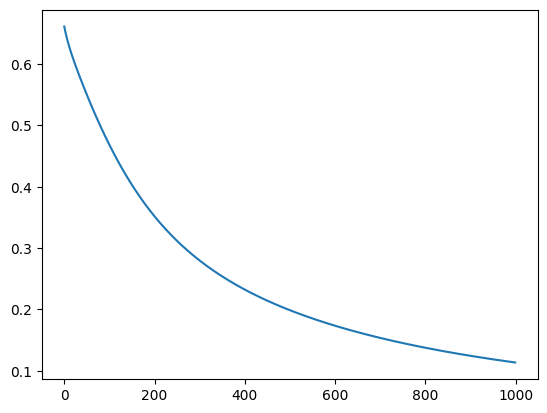

0.7282364312454577


In [13]:

import matplotlib.pyplot as plt
import numpy as np

def sigmoid_act(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def sum_square_error(error_list):
    return np.sum(np.square(error_list)) / 2

def mlnn(inp, out, v11, v12, v21, v22, w1, w2, alpha):
    total_error_in_each_epoch = []
    total_error = 1

    for epoch in range(1000):  # loop for epochs
        if total_error <= 0.02:  # early stopping criterion
            break
        error_list = []

        for idx, obs in enumerate(inp):  # loop through input examples
            # Feedforward phase
            # Hidden layer calculations
            H1 = obs[0] * v11 + obs[1] * v21
            s1 = sigmoid_act(H1)
            H2 = obs[0] * v12 + obs[1] * v22
            s2 = sigmoid_act(H2)

            # Output layer calculation
            O = s1 * w1 + s2 * w2
            s = sigmoid_act(O)  # output of the network

            # Error calculation
            error = out[idx] - s
            error_list.append(error)

            # Backpropagation phase
            # Output layer weight updates
            delta_output = error * sigmoid_derivative(s)
            w1 += alpha * delta_output * s1
            w2 += alpha * delta_output * s2

            # Hidden layer weight updates
            delta_s1 = delta_output * w1 * sigmoid_derivative(s1)
            delta_s2 = delta_output * w2 * sigmoid_derivative(s2)

            v11 += alpha * delta_s1 * obs[0]
            v21 += alpha * delta_s1 * obs[1]
            v12 += alpha * delta_s2 * obs[0]
            v22 += alpha * delta_s2 * obs[1]

        # Calculate total error for this epoch
        total_error = sum_square_error(error_list)
        total_error_in_each_epoch.append(total_error)

    return total_error_in_each_epoch, v11, v12, v21, v22, w1, w2,epoch  # return final weights and error log

input = [[0,0],
         [0,1],
         [1,0],
         [1,1]]

output = [0,0,0,1]
v11 = 0.5
v12 = 0.7
v21=-0.5
v22 = -0.7

w1 = 8
w2 = -7
alpha = 0.05

total_error_for_each_epoch,v11, v12, v21, v22, w1, w2,epoch = mlnn(input,output,v11, v12, v21, v22, w1, w2, alpha)

print(f"v11 ={v11} , v12 ={v12} ,v21 = {v21} , v22 ={v22} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)
plt.show()
# Testing

test = [1,1]

h1 = v11 * test[0] + v21 * test[1]
s1 = sigmoid_act(h1)
h2 = v12 * test[0] + v22 * test[1]
s2 = sigmoid_act(h2)

h3 = s1 * w1 + s2 * w2
out = sigmoid_act(h3)
print(out)


v11 =0.8859040389921069 , v12 =1.274797661674506 ,v21 = -0.8738967807251931 , v22 =-0.8176399273581152 , w1 =7.830388105233992 , w2 = -7.122868300367139 ,epoch = 999


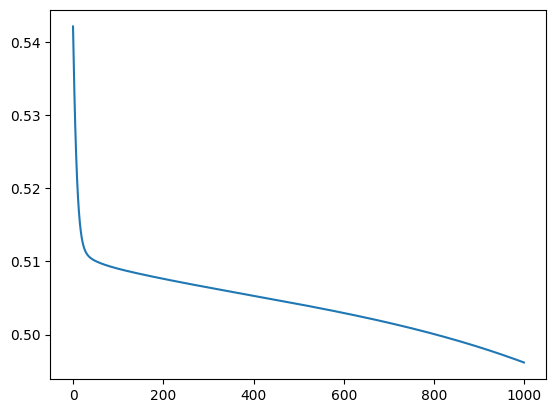

0.39581922070996356


In [14]:

import matplotlib.pyplot as plt
import numpy as np

def sigmoid_act(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def sum_square_error(error_list):
    return np.sum(np.square(error_list)) / 2

def mlnn(inp, out, v11, v12, v21, v22, w1, w2, alpha):
    total_error_in_each_epoch = []
    total_error = 1

    for epoch in range(1000):  # loop for epochs
        if total_error <= 0.02:  # early stopping criterion
            break
        error_list = []

        for idx, obs in enumerate(inp):  # loop through input examples
            # Feedforward phase
            # Hidden layer calculations
            H1 = obs[0] * v11 + obs[1] * v21
            s1 = sigmoid_act(H1)
            H2 = obs[0] * v12 + obs[1] * v22
            s2 = sigmoid_act(H2)

            # Output layer calculation
            O = s1 * w1 + s2 * w2
            s = sigmoid_act(O)  # output of the network

            # Error calculation
            error = out[idx] - s
            error_list.append(error)

            # Backpropagation phase
            # Output layer weight updates
            delta_output = error * sigmoid_derivative(s)
            w1 += alpha * delta_output * s1
            w2 += alpha * delta_output * s2

            # Hidden layer weight updates
            delta_s1 = delta_output * w1 * sigmoid_derivative(s1)
            delta_s2 = delta_output * w2 * sigmoid_derivative(s2)

            v11 += alpha * delta_s1 * obs[0]
            v21 += alpha * delta_s1 * obs[1]
            v12 += alpha * delta_s2 * obs[0]
            v22 += alpha * delta_s2 * obs[1]

        # Calculate total error for this epoch
        total_error = sum_square_error(error_list)
        total_error_in_each_epoch.append(total_error)

    return total_error_in_each_epoch, v11, v12, v21, v22, w1, w2,epoch  # return final weights and error log

input = [[0,0],
         [0,1],
         [1,0],
         [1,1]]

output = [0,1,1,0]
v11 = 0.5
v12 = 0.7
v21=-0.5
v22 = -0.7

w1 = 8
w2 = -7
alpha = 0.05

total_error_for_each_epoch,v11, v12, v21, v22, w1, w2,epoch = mlnn(input,output,v11, v12, v21, v22, w1, w2, alpha)

print(f"v11 ={v11} , v12 ={v12} ,v21 = {v21} , v22 ={v22} , w1 ={w1} , w2 = {w2} ,epoch = {epoch}")

plt.plot(total_error_for_each_epoch)
plt.show()
# Testing

test = [1,1]

h1 = v11 * test[0] + v21 * test[1]
s1 = sigmoid_act(h1)
h2 = v12 * test[0] + v22 * test[1]
s2 = sigmoid_act(h2)

h3 = s1 * w1 + s2 * w2
out = sigmoid_act(h3)
print(out)


v11 =-0.9353755639830693 , v12 =1.643474557638627 ,v21 = -1.4015723016013593 , v22 =-0.16863824575500588 , w11 =8.136346565692195 , w12 = -7.511760412470614,w21 = -1.285656477528872,w22 = 1.2448655755964033 ,epoch = 799


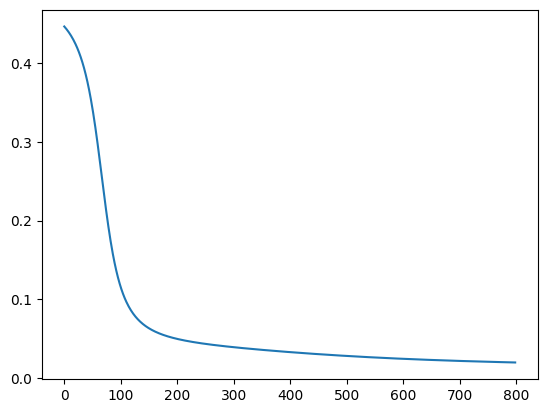

0.5869105871054489


In [15]:
def map_out(x):
  if x == 0:
    return 1,0
  else:
    return 0,1


def mlnn(inp,out,v11,v12,v21,v22,w11,w12,w21,w22,alpha):
  total_error = 1
  total_error_in_each_epoch = []
  for epoch in range(1000):
    if total_error < 0.02:
      break

    error_list = []
    for idx,obs in enumerate(inp):
      h1 = v11 * obs[0] + v21 * obs[1]
      s1 = sigmoid_act(h1)
      h2 = v12 * obs[0] + v22 * obs[1]
      s2 = sigmoid_act(h2)

      Z1 = s1 * w11 + s2 * w21
      o1 = sigmoid_act(Z1)
      Z2 = s1 * w12 + s2 * w22
      o2 = sigmoid_act(Z2)

      t1,t2 = map_out(out[idx])
      error = 0.5 * ((t1-o1)**2 + (t2 - o2) ** 2)
      error_list.append(error)
      delta_o1 = (t1 - o1) * sigmoid_derivative(o1)
      delta_o2 = (t2 - o2) * sigmoid_derivative(o2)
      w11 += alpha * delta_o1 *  s1
      w12 += alpha * delta_o2 *  s1
      w21 += alpha * delta_o1 *  s2
      w22 += alpha * delta_o2 * s2

      delta_h1 = sigmoid_derivative(s1) * (delta_o1 * w11 + delta_o2 * w12 )
      delta_h2 = sigmoid_derivative(s2) * (delta_o1 * w21 + delta_o2 * w22 )

      v11 += alpha * delta_h1 * obs[0]
      v12 += alpha * delta_h2 * obs[0]
      v21 += alpha * delta_h1 * obs[1]
      v22 += alpha * delta_h2 * obs[1]

    total_error = sum_square_error(error_list)
    total_error_in_each_epoch.append(total_error)

  return v11,v12,v21,v22,w11,w12,w21,w22,total_error_in_each_epoch,epoch


input = [[0,0],
         [0,1],
         [1,0],
         [1,1]]

output = [0,0,0,1]
v11 = 0.5
v12 = 0.7
v21=-0.5
v22 = -0.7

w11 = 8
w12 = -7
w21 = 0.5
w22 = 0.75
alpha = 0.05

v11,v12,v21,v22,w11,w12,w21,w22,total_error_in_each_epoch,epoch = mlnn(input,output,v11,v12,v21,v22,w11,w12,w21,w22,alpha)

print(f"v11 ={v11} , v12 ={v12} ,v21 = {v21} , v22 ={v22} , w11 ={w11} , w12 = {w12},w21 = {w21},w22 = {w22} ,epoch = {epoch}")

plt.plot(total_error_in_each_epoch)
plt.show()
# Testing

test = [1,1]

h1 = v11 * test[0] + v21 * test[1]
s1 = sigmoid_act(h1)
h2 = v12 * test[0] + v22 * test[1]
s2 = sigmoid_act(h2)

Z1  = s1 * w11 + s2 * w21
o1 = sigmoid_act(Z1)
Z2 = s1 * w12 + s2 * w22
o2 = sigmoid_act(Z2)


print(o2)